<a href="https://colab.research.google.com/github/Impana1717/eda/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Cell 1: Install & imports (run once)
!pip install --quiet seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import files
import os

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10,5)
sns.set_theme(style="whitegrid")
print("Libraries ready")


Libraries ready


In [16]:
# Cell 2: Load datasets
retail_path = '/content/retail_sales_dataset.csv'   # uploaded file
menu_path   = '/content/menu.csv'                   # uploaded file

retail = pd.read_csv(retail_path, low_memory=False)
menu   = pd.read_csv(menu_path, low_memory=False)

print("Retail shape:", retail.shape)
print("Menu shape:", menu.shape)
print("\nRetail columns:", retail.columns.tolist())
print("\nMenu columns (first 15):", menu.columns.tolist()[:15])
display(retail.head())
display(menu.head())


Retail shape: (1000, 9)
Menu shape: (260, 24)

Retail columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

Menu columns (first 15): ['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates']


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
# Cell 3: Standardize/trim column names (keeps original case mapping for later)
retail.columns = [c.strip() for c in retail.columns]
menu.columns   = [c.strip() for c in menu.columns]

# Confirm the expected retail column names (from your earlier output)
expected = ['Transaction ID','Date','Customer ID','Gender','Age','Product Category','Quantity','Price per Unit','Total Amount']
print("Expected retail columns (should match one-to-one):")
print(expected)
print("\nRetail columns present:")
print(retail.columns.tolist())


Expected retail columns (should match one-to-one):
['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

Retail columns present:
['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [ ]:
# Cell 4: Clean retail dataset (types, missing, duplicates)
df = retail.copy()

# Convert types
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

# Report missing
print("Missing values before cleaning:\n", df.isnull().sum())

# Drop rows missing both Date and Total Amount (can't analyze)
df = df.dropna(subset=['Date','Total Amount'], how='all')

# For small missing numeric fields, fill with reasonable default
df['Quantity'] = df['Quantity'].fillna(0)
df['Price per Unit'] = df['Price per Unit'].fillna(0)
df['Total Amount'] = df['Total Amount'].fillna(df['Quantity'] * df['Price per Unit'])

# Drop exact duplicates
before = len(df)
df = df.drop_duplicates()
print(f"Dropped {before - len(df)} duplicate rows")

# Final missing report
print("\nMissing values after cleaning:\n", df.isnull().sum())
display(df.head())


Missing values before cleaning:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Dropped 0 duplicate rows

Missing values after cleaning:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Cell 5: Basic cleaning for menu.csv
menu_df = menu.copy()

# Standard numeric conversions if present
for col in menu_df.columns:
    if menu_df[col].dtype == object:
        # trim strings
        menu_df[col] = menu_df[col].astype(str).str.strip()

# Remove exact duplicates
menu_df = menu_df.drop_duplicates()
print("Menu cleaned. Shape:", menu_df.shape)
display(menu_df.head())


Menu cleaned. Shape: (260, 24)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
# Cell 6: Merge strategies
merged = None

# 1) Try merge on 'Product Category' if present in both
if 'Product Category' in df.columns and 'Product Category' in menu_df.columns:
    merged = pd.merge(df, menu_df, on='Product Category', how='left', suffixes=('_retail','_menu'))
    print("Merged on Product Category. Result shape:", merged.shape)

# 2) If not merged or menu has 'Product Name' / 'Item', attempt other joins
if merged is None or merged.shape[0] == 0:
    # try product name columns
    candidates_menu = [c for c in menu_df.columns if 'name' in c.lower() or 'product' in c.lower()][:3]
    candidates_retail = [c for c in df.columns if 'product' in c.lower() or 'item' in c.lower()][:3]
    if candidates_retail and candidates_menu:
        merged = pd.merge(df, menu_df, left_on=candidates_retail[0], right_on=candidates_menu[0], how='left')
        print(f"Merged on {candidates_retail[0]} <-> {candidates_menu[0]}. Result shape:", merged.shape)

# 3) Fallback: left-join retail with menu without keys (just attach menu as aggregate columns) — unlikely ideal
if merged is None:
    merged = df.copy()
    print("No suitable join key found; proceeding with retail data only (menu not merged).")

# show result
display(merged.head())


No suitable join key found; proceeding with retail data only (menu not merged).


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Cell 7: Descriptive stats for key numeric columns
num_cols = ['Quantity', 'Price per Unit', 'Total Amount']
print("Descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max):")
display(merged[num_cols].describe().T)

# Mode examples
for c in num_cols:
    mode_vals = merged[c].mode().tolist()
    print(f"Mode for {c}:", mode_vals[:5])

# Additional metrics
print("\nMedian values:")
print(merged[num_cols].median())


Descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max):


,count,mean,std,min,25%,50%,75%,max
Quantity,1000.0,2.514,1.132734,1.0,1.0,3.0,4.0,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.0,50.0,300.0,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.0,135.0,900.0,2000.0


Mode for Quantity: [4]
Mode for Price per Unit: [50]
Mode for Total Amount: [50]

Median values:
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64


/tmp/ipython-input-4282923943.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = merged.set_index('Date').resample('M')['Total Amount'].sum()


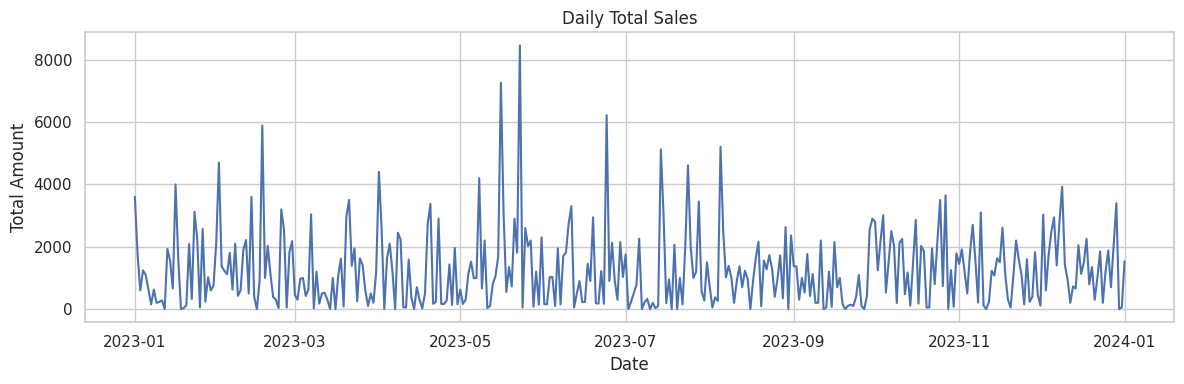

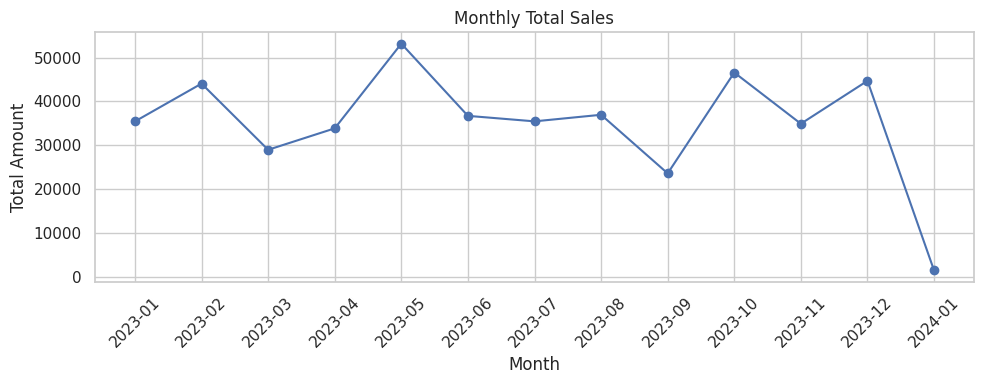

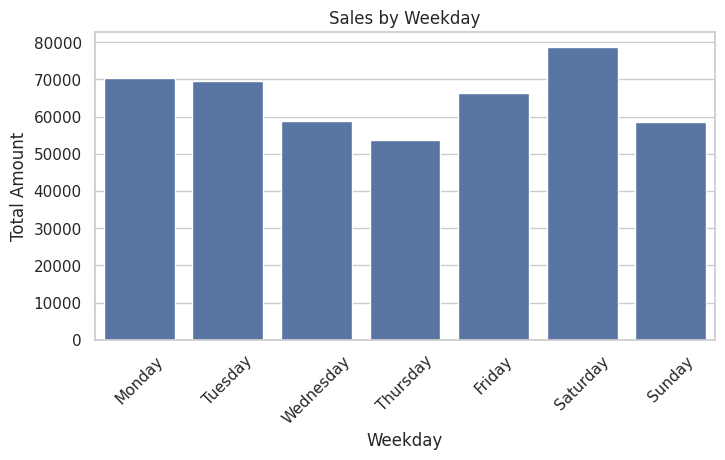

In [ ]:
# Cell 8: Time series aggregates and plots
merged = merged.copy()
merged['Date'] = pd.to_datetime(merged['Date'], errors='coerce')
merged = merged.dropna(subset=['Date'])

daily = merged.set_index('Date').resample('D')['Total Amount'].sum()
monthly = merged.set_index('Date').resample('M')['Total Amount'].sum()

# Plot daily
plt.figure(figsize=(12,4))
plt.plot(daily.index, daily.values)
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()

# Plot monthly
plt.figure(figsize=(10,4))
plt.plot(monthly.index.to_series().dt.to_period('M').astype(str), monthly.values, marker='o')
plt.title("Monthly Total Sales")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()

# Weekday seasonality
merged['Weekday'] = merged['Date'].dt.day_name()
weekday_sales = merged.groupby('Weekday')['Total Amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).fillna(0)

plt.figure(figsize=(8,4))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title("Sales by Weekday")
plt.xticks(rotation=45)
plt.ylabel("Total Amount")
plt.show()


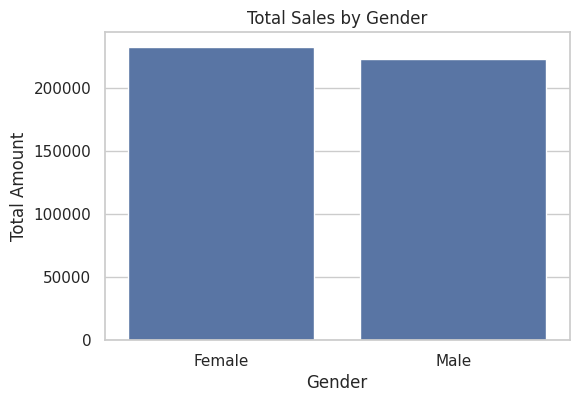

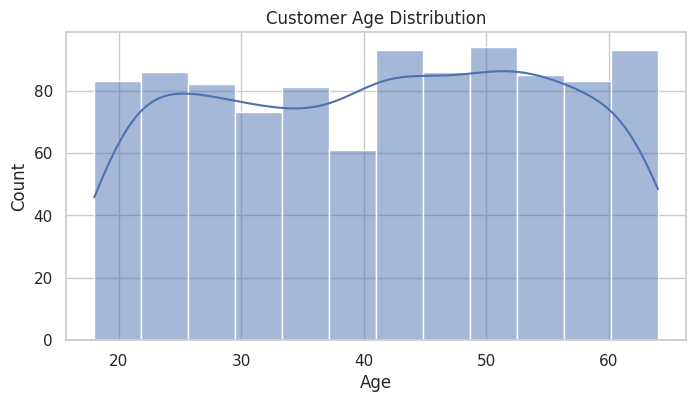

/tmp/ipython-input-1430287159.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = merged.groupby('Age Group')['Total Amount'].mean().reset_index()


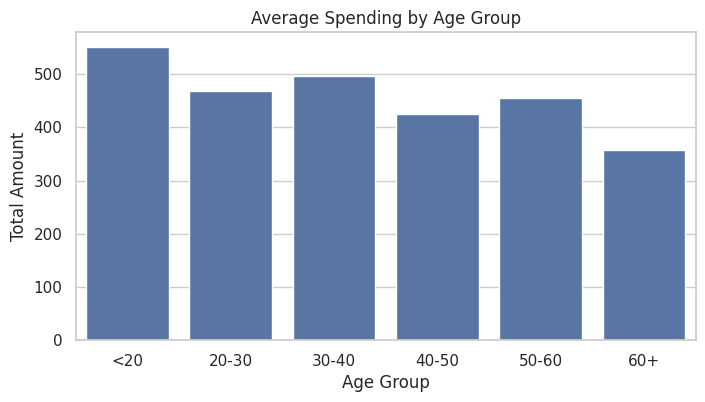

,Customer ID,Total Amount
0,CUST015,2000
1,CUST412,2000
2,CUST970,2000
3,CUST547,2000
4,CUST281,2000
5,CUST416,2000
6,CUST420,2000
7,CUST927,2000
8,CUST447,2000
9,CUST342,2000


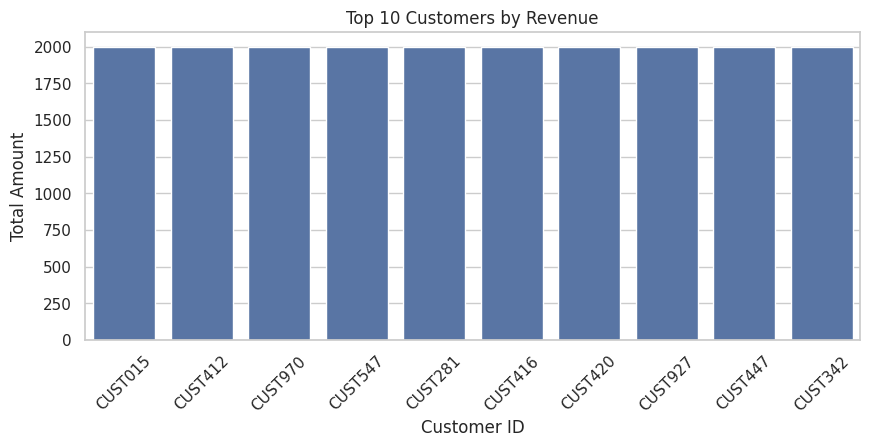

In [ ]:
# Cell 9: Customer demographics & top customers
# Gender sales
if 'Gender' in merged.columns:
    gender_sales = merged.groupby('Gender')['Total Amount'].sum().reset_index()
    plt.figure(figsize=(6,4))
    sns.barplot(data=gender_sales, x='Gender', y='Total Amount')
    plt.title("Total Sales by Gender")
    plt.show()

# Age distribution & spending by age group
if 'Age' in merged.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(merged['Age'].dropna(), bins=12, kde=True)
    plt.title("Customer Age Distribution")
    plt.show()

    merged['Age Group'] = pd.cut(merged['Age'].fillna(0), bins=[0,20,30,40,50,60,100],
                                 labels=['<20','20-30','30-40','40-50','50-60','60+'])
    age_spend = merged.groupby('Age Group')['Total Amount'].mean().reset_index()
    plt.figure(figsize=(8,4))
    sns.barplot(data=age_spend, x='Age Group', y='Total Amount')
    plt.title("Average Spending by Age Group")
    plt.show()

# Top customers
top_customers = merged.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10).reset_index()
display(top_customers)
plt.figure(figsize=(10,4))
sns.barplot(data=top_customers, x='Customer ID', y='Total Amount')
plt.title("Top 10 Customers by Revenue")
plt.xticks(rotation=45)
plt.show()


,Product Category,Total Amount
0,Electronics,156905
1,Clothing,155580
2,Beauty,143515


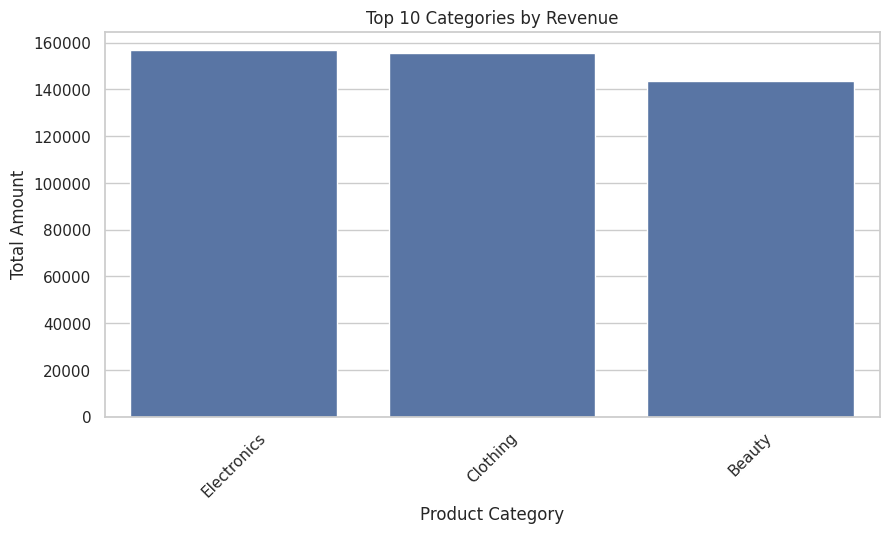

In [ ]:
# Cell 10: Product/category analysis
if 'Product Category' in merged.columns:
    cat_sales = merged.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()
    display(cat_sales.head(20))

    plt.figure(figsize=(10,5))
    sns.barplot(data=cat_sales.head(10), x='Product Category', y='Total Amount')
    plt.title("Top 10 Categories by Revenue")
    plt.xticks(rotation=45)
    plt.show()

# If menu includes product name/sku and merged preserved them, show top items by revenue
possible_prod_cols = [c for c in merged.columns if 'name' in c.lower() or 'product' in c.lower() and c not in ['Product Category']]
if possible_prod_cols:
    prod_col = possible_prod_cols[0]
    top_items = merged.groupby(prod_col)['Total Amount'].sum().sort_values(ascending=False).head(10).reset_index()
    display(top_items)


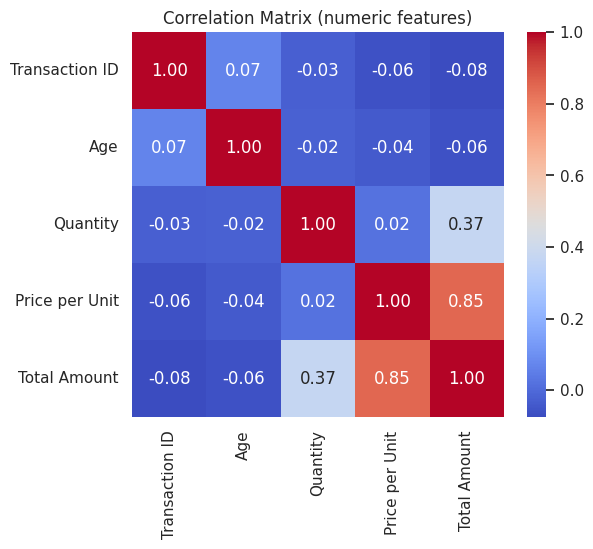

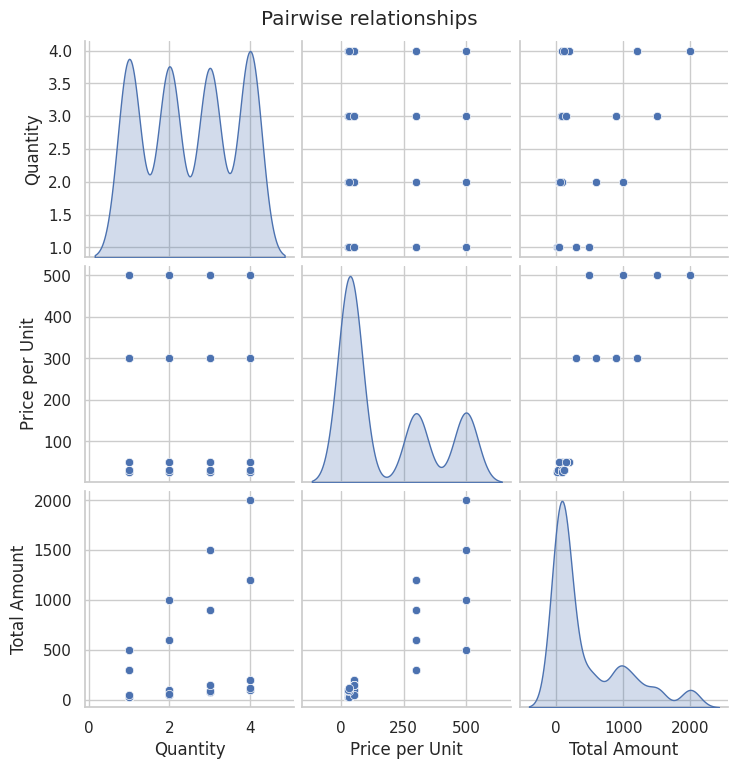

In [ ]:
# Cell 11: Correlation heatmap
numeric = merged.select_dtypes(include=[np.number]).copy()
if numeric.shape[1] >= 2:
    plt.figure(figsize=(6,5))
    sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix (numeric features)")
    plt.show()

# Pairplot (may be slow if large)
small = merged[['Quantity','Price per Unit','Total Amount']].dropna()
if len(small) <= 5000:
    sns.pairplot(small, diag_kind='kde')
    plt.suptitle("Pairwise relationships", y=1.02)
    plt.show()
else:
    print("Pairplot skipped (too many rows).")


In [ ]:
# Cell 12: RFM segmentation
# Requires Customer ID and Date + Total Amount
if 'Customer ID' in merged.columns:
    snapshot = merged['Date'].max() + pd.Timedelta(days=1)
    rfm = merged.groupby('Customer ID').agg(
        recency = ('Date', lambda x: (snapshot - x.max()).days),
        frequency = ('Transaction ID', lambda x: x.nunique()) if 'Transaction ID' in merged.columns else ('Date', lambda x: x.nunique()),
        monetary = ('Total Amount', 'sum')
    ).reset_index()

    # RFM scores (quartiles)
    rfm['r_score'] = pd.qcut(rfm['recency'].rank(method='first'), 4, labels=[4,3,2,1]).astype(int)
    rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
    rfm['m_score'] = pd.qcut(rfm['monetary'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
    rfm['rfm_score'] = rfm['r_score'].map(str) + rfm['f_score'].map(str) + rfm['m_score'].map(str)

    display(rfm.head())
else:
    print("Customer ID column not found; skipping RFM.")


,Customer ID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,CUST001,39,1,150,4,1,3,413
1,CUST002,309,1,1000,1,1,4,114
2,CUST003,354,1,30,1,1,1,111
3,CUST004,226,1,500,2,1,3,213
4,CUST005,241,1,100,2,1,2,212


In [ ]:
# Cell 13: Auto recommendations (basic heuristics)
recs = []
# Top categories
if 'Product Category' in merged.columns:
    top_cats = merged.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
    top10 = top_cats.head(10)
    share_top10 = top10.sum() / top_cats.sum()
    recs.append(f"Top 10 categories account for {share_top10:.1%} of revenue — prioritize inventory & promos for them.")

# Weekday staffing
if weekday_sales.sum() > 0:
    peak_day = weekday_sales.idxmax()
    recs.append(f"Peak sales on {peak_day} — increase staffing and promotions on that day.")

# Customer loyalty
if 'Customer ID' in merged.columns:
    top_customers_share = merged.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10).sum() / merged['Total Amount'].sum()
    recs.append(f"Top 10 customers contribute {top_customers_share:.1%} of revenue — consider loyalty offers for these.")

print("Recommendations:")
for r in recs:
    print("-", r)


Recommendations:
- Top 10 categories account for 100.0% of revenue — prioritize inventory & promos for them.
- Peak sales on Saturday — increase staffing and promotions on that day.
- Top 10 customers contribute 4.4% of revenue — consider loyalty offers for these.


In [ ]:
# Cell 14: Save cleaned merged dataset and some key plots
OUT_DIR = 'eda_outputs'
os.makedirs(OUT_DIR, exist_ok=True)

# Save merged cleaned dataset
merged_file = os.path.join(OUT_DIR, 'cleaned_merged_retail_menu.csv')
merged.to_csv(merged_file, index=False)
print("Saved merged cleaned dataset to:", merged_file)

# Save example plots (monthly and weekday)
monthly_plot = os.path.join(OUT_DIR, 'monthly_sales.png')
plt.figure(figsize=(10,4))
plt.plot(monthly.index.to_series().dt.to_period('M').astype(str), monthly.values, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Total Sales")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.savefig(monthly_plot)
plt.close()
print("Saved:", monthly_plot)

weekday_plot = os.path.join(OUT_DIR, 'weekday_sales.png')
plt.figure(figsize=(8,4))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title("Sales by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(weekday_plot)
plt.close()
print("Saved:", weekday_plot)

# Zip outputs for easier download
import shutil
zipname = 'eda_outputs.zip'
shutil.make_archive('eda_outputs', 'zip', OUT_DIR)
print("Created zip:", zipname)

# Provide download
files.download(zipname)


Saved merged cleaned dataset to: eda_outputs/cleaned_merged_retail_menu.csv
Saved: eda_outputs/monthly_sales.png
Saved: eda_outputs/weekday_sales.png
Created zip: eda_outputs.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>